Using the glass.csv file on Github, answer the following questions-

1)Try different thresholds for computing predictions using 'Al' column. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.

2)Do the same analysis for other columns

3)Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding).

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/abirami1998/NYU-Data-Science-Bootcamp-Spring-2024/main/Week%208/glass.csv")

In [33]:
glass = df
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [12]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

In [14]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]


Text(0, 0.5, 'household')

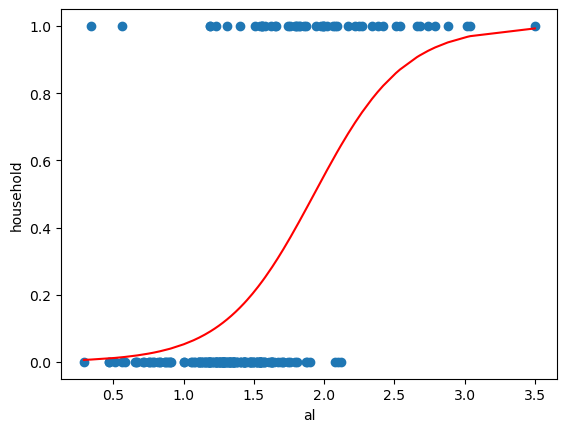

In [19]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [24]:
logreg.predict_proba?

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

In [23]:
precision_score(y_true=y, y_pred=pred)


0.896551724137931

In [35]:
another_column = 'Ca'

In [36]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass[another_column]).reshape(-1,1)
y = glass.household

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[0.06355542]]), array([-1.73328109]))

In [38]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]


Text(0, 0.5, 'household')

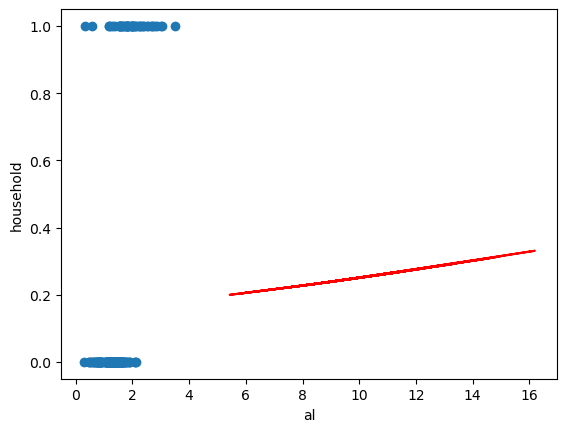

In [42]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass[another_column], glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [43]:
accuracy_score(y_true=y, y_pred=pred)

0.7616822429906542

In [44]:
precision_score(y_true=y, y_pred=pred)


/Users/harshithaguthikonda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [49]:
data_train = glass.copy()

data_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,0.238434
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,0.212380
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0.245075
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0.245075
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,0.250882


In [50]:
cat_cols = ["Type"]
cat_data = data_train[cat_cols]
cat_cols

['Type']

In [51]:

final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True,dtype=int)
final_data.shape

(214, 16)

In [53]:
from sklearn.model_selection import train_test_split

y = final_data['household']
X = final_data.drop(columns=['household'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (171, 15)
Validation Set Dimensions: (43, 15)


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [60]:

# Apply standard scaling on numeric data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [61]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [62]:
mean_squared_error(y_train,reg.predict(X_train))/np.mean(y_train)


3.259366800683183e-30